In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
wine_dataset = pd.read_csv('session3_winequality-red.csv')
wine_dataset.shape

(1599, 12)

In [15]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
dependent_variable = 'quality'
independent_variables = [x for x in list(wine_dataset.columns) if x != dependent_variable]

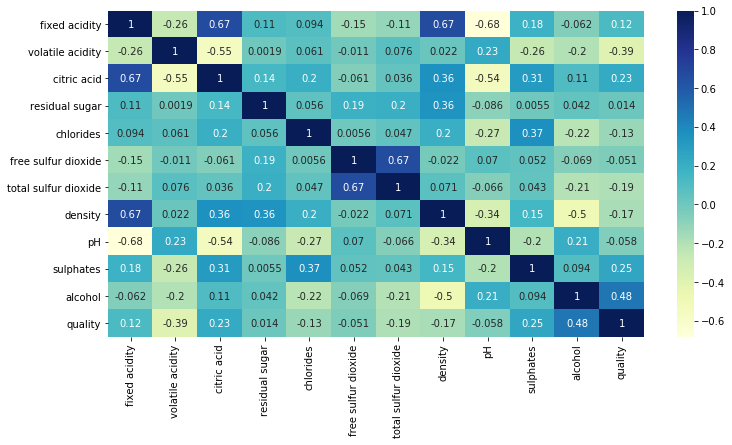

In [53]:
plt.figure(figsize=(12, 6))
sns.heatmap(wine_dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [47]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


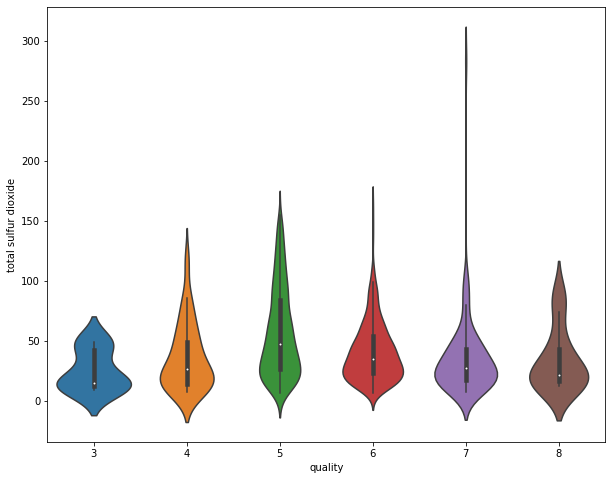

In [55]:
plt.figure(figsize=(10,8))
sns.violinplot(x='quality', y='total sulfur dioxide', data=wine_dataset)
plt.show()

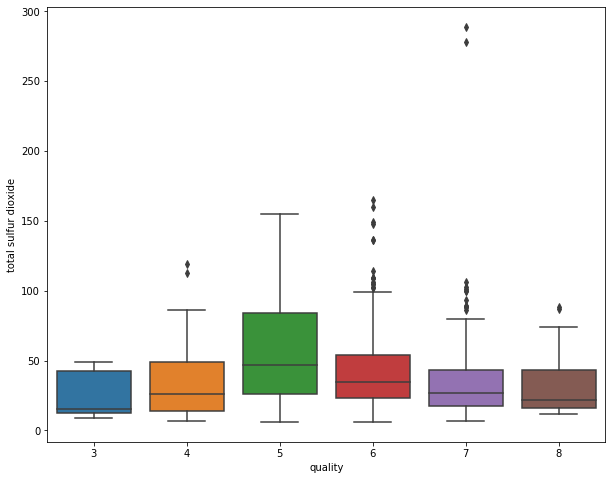

In [56]:
plt.figure(figsize=(10,8))
sns.boxplot(x='quality', y='total sulfur dioxide', data=wine_dataset)
plt.show()

In [66]:
byQuality = wine_dataset.groupby(by='quality')
byQuality['total sulfur dioxide'].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,24.900000,16.828877,9.0,12.5,15.0,42.5,49.0
4,53.0,36.245283,27.583374,7.0,14.0,26.0,49.0,119.0
5,681.0,56.513950,36.993116,6.0,26.0,47.0,84.0,155.0
6,638.0,40.869906,25.038250,6.0,23.0,35.0,54.0,165.0
7,199.0,35.020101,33.191206,7.0,17.5,27.0,43.0,289.0
8,18.0,33.444444,25.433240,12.0,16.0,21.5,43.0,88.0


In [35]:
X = wine_dataset[independent_variables]
y = wine_dataset[dependent_variable]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
import statsmodels.api as sm

In [39]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [42]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const                   46.130715
fixed acidity            0.043819
volatile acidity        -1.087334
citric acid             -0.201464
residual sugar           0.044837
chlorides               -1.815720
free sulfur dioxide      0.001864
total sulfur dioxide    -0.003208
density                -42.328675
pH                      -0.384858
sulphates                0.922563
alcohol                  0.270106
dtype: float64

In [43]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     61.42
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          1.68e-106
Time:                        11:13:51   Log-Likelihood:                -1086.5
No. Observations:                1119   AIC:                             2197.
Df Residuals:                    1107   BIC:                             2257.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.1307 